### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [62]:
data = pd.read_csv('data/coupons.csv')

In [63]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [64]:
# Check for missing values in the dataset
missing_data = data.isnull()
# Count the number of missing values in each column
missing_data_count = data.isnull().sum()


3. Decide what to do about your missing data -- drop, replace, other...

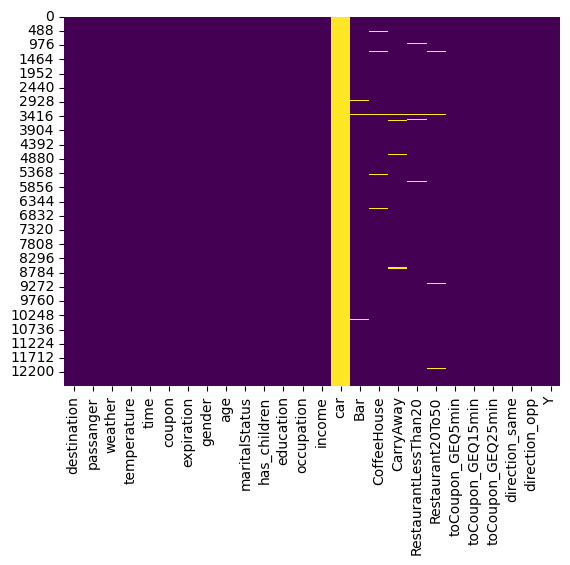

In [65]:
# Visualize missing data using a heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

4. What proportion of the total observations chose to accept the coupon? 



In [66]:
# Calculate the number of observations that accepted the coupon (Y = 1)
accepted_count = data['Y'].sum()

# Calculate the total number of observations in the dataset
total_observations = len(data)

# Calculate the proportion of acceptance
proportion_accepted = accepted_count / total_observations

# Print the proportion
print("Proportion of total observations that accepted the coupon:", proportion_accepted)


Proportion of total observations that accepted the coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

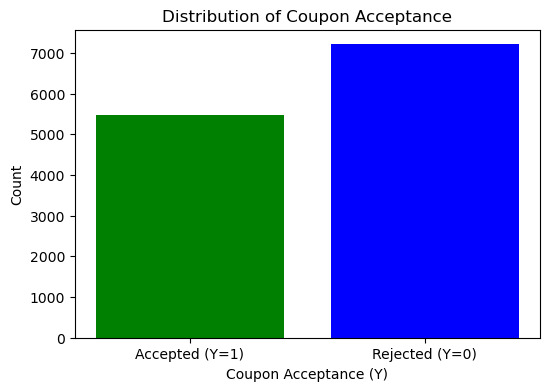

In [67]:
# Count the number of observations for each value in the 'Y' column (coupon acceptance)
coupon_counts = data['Y'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(coupon_counts.index, coupon_counts.values, color=['blue', 'green'])
plt.xlabel('Coupon Acceptance (Y)')
plt.ylabel('Count')
plt.title('Distribution of Coupon Acceptance')
plt.xticks(coupon_counts.index, labels=['Rejected (Y=0)', 'Accepted (Y=1)'])
plt.show()


6. Use a histogram to visualize the temperature column.

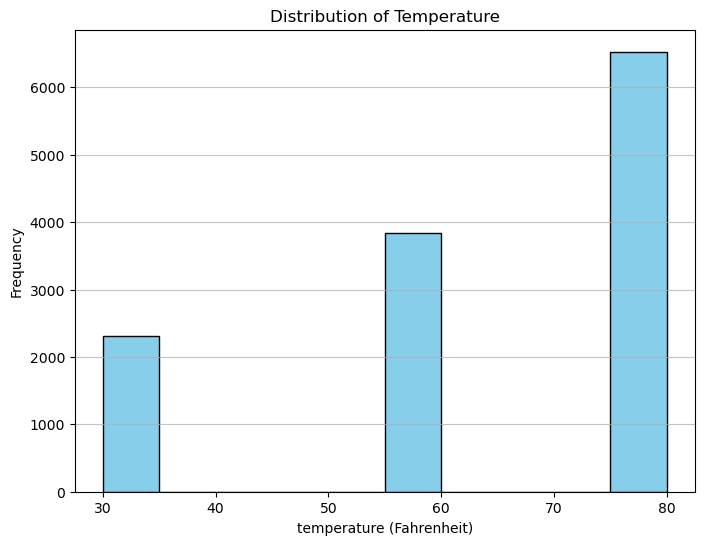

In [68]:
# Create a histogram for the 'Temperature' column
plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.grid(axis='y', alpha=0.75)
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [69]:
# Create a new DataFrame with only the rows where the coupon type is 'bar'
bar_coupons_df = data[data['coupon'] == 'Bar']
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [70]:
# Calculate the number of bar coupons that were accepted (Y = 1) within the bar_coupons_df
accepted_count = (bar_coupons_df['Y'] == 1).sum()

# Calculate the total number of bar coupons in the bar_coupons_df
total_bar_coupons = len(bar_coupons_df)

# Calculate the proportion of acceptance for bar coupons
proportion_accepted = accepted_count / total_bar_coupons

# Print the proportion
print("Proportion of bar coupons that were accepted:", proportion_accepted)


Proportion of bar coupons that were accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [71]:
# Subset the DataFrame for low-frequency bar-goers (3 or fewer times a month)
low_freq_bar_goers = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]

# Subset the DataFrame for high-frequency bar-goers (more than 3 times a month)
high_freq_bar_goers = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]

# Calculate the acceptance rate for each subset
acceptance_rate_low_freq = (low_freq_bar_goers['Y'] == 1).mean()
acceptance_rate_high_freq = (high_freq_bar_goers['Y'] == 1).mean()

# Print the acceptance rates
print("Acceptance rate for low-frequency bar-goers:", acceptance_rate_low_freq)
print("Acceptance rate for high-frequency bar-goers:", acceptance_rate_high_freq)


Acceptance rate for low-frequency bar-goers: 0.37061769616026713
Acceptance rate for high-frequency bar-goers: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [85]:
# Subset the DataFrame for drivers who go to a bar more than once a month and are over the age of 25
high_freq_age_over_25 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (~(bar_coupons_df['age'].isin(['below21', '21'])))]

# Subset the DataFrame for all other drivers (not meeting the above conditions)
other_drivers = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (~(bar_coupons_df['age'].isin(['below21', '21']))))]

# Calculate the acceptance rate for drivers who go to a bar more than once a month and are over 25
acceptance_rate_high_freq_age_over_25 = (high_freq_age_over_25['Y'] == 1).mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_other_drivers = (other_drivers['Y'] == 1).mean()

# Print the acceptance rates
print("Acceptance rate for drivers who go to a bar more than once a month and are over 25:", acceptance_rate_high_freq_age_over_25)
print("Acceptance rate for all other drivers:", acceptance_rate_other_drivers)


Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.6952380952380952
Acceptance rate for all other drivers: 0.33500313087038197


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [86]:
# Subset the DataFrame for drivers who go to a bar more than once a month and meet the specified conditions
selected_drivers = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_df['passanger'] != 'kid') &
    (~bar_coupons_df['occupation'].isin(['farming', 'fishing', 'forestry']))
]

# Subset the DataFrame for all other drivers (not meeting the above conditions)
other_drivers = bar_coupons_df[
    ~(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) |
    (bar_coupons_df['passanger'] == 'kid') |
    (bar_coupons_df['occupation'].isin(['farming', 'fishing', 'forestry']))
]

# Calculate the acceptance rate for drivers who meet the specified conditions
acceptance_rate_selected_drivers = (selected_drivers['Y'] == 1).mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_other_drivers = (other_drivers['Y'] == 1).mean()

# Print the acceptance rates
print("Acceptance rate for drivers who meet the specified conditions:", acceptance_rate_selected_drivers)
print("Acceptance rate for all other drivers:", acceptance_rate_other_drivers)


Acceptance rate for drivers who meet the specified conditions: 0.6879194630872483
Acceptance rate for all other drivers: 0.29345531315974666


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [87]:
# Create masks for each of the specified conditions
condition1 = (
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_df['passanger'] != 'kid') &
    (bar_coupons_df['maritalStatus'] != 'widowed')
)

condition2 = (
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_df['age'].isin(['below21', '21', '26']))
)

condition3 = (
    (bar_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

# Combine the conditions with OR and create a mask for drivers who meet any of the conditions
combined_condition = condition1 | condition2 | condition3

# Subset the DataFrame for drivers who meet any of the specified conditions
selected_drivers = bar_coupons_df[combined_condition]

# Subset the DataFrame for all other drivers (not meeting any of the conditions)
other_drivers = bar_coupons_df[~combined_condition]

# Calculate the acceptance rate for drivers who meet any of the specified conditions
acceptance_rate_selected_drivers = (selected_drivers['Y'] == 1).mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_other_drivers = (other_drivers['Y'] == 1).mean()

# Print the acceptance rates
print("Acceptance rate for drivers who meet any of the specified conditions:", acceptance_rate_selected_drivers)
print("Acceptance rate for all other drivers:", acceptance_rate_other_drivers)


Acceptance rate for drivers who meet any of the specified conditions: 0.5753086419753086
Acceptance rate for all other drivers: 0.2990886495443248


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations and comparisons made between different groups of drivers who accepted bar coupons, we can formulate the following hypotheses:

Age Hypothesis: Drivers who are under the age of 30 seem to have a higher acceptance rate for bar coupons compared to older drivers. This suggests that younger individuals may be more inclined to accept bar coupons.

Passenger Hypothesis: Drivers who do not have children (passenger is not a kid) and are not widowed are more likely to accept bar coupons. This implies that drivers without family-related constraints (such as having kids or being widowed) are more receptive to bar coupons.

Income Hypothesis: Drivers with lower annual incomes seem to have a higher acceptance rate for bar coupons. This suggests that individuals with lower incomes may be more motivated to take advantage of discounts and coupons at bars.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [58]:
# Create a new DataFrame for Coffee House coupons
coffee_house_coupons_df = data[data['coupon'] == 'Coffee House']
coffee_house_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [57]:
# Calculate the proportion of Coffee House coupons that were accepted (Y = 1)
acceptance_proportion = (coffee_house_coupons_df['Y'] == 1).mean()

# Print the proportion
print("Proportion of Coffee House Coupons Accepted:", acceptance_proportion)


Proportion of Coffee House Coupons Accepted: 0.49924924924924924


In [99]:
# Create a subset of the DataFrame for drivers who are Single Male Students
subset_single_male_students = data[(data['maritalStatus'].isin(['Single'])) & (data['occupation'].isin(['Student'])) & (data['gender'].isin(['Male']))]

# Create a subset for all other drivers (not meeting the above conditions)
subset_all_others = data[~((data['maritalStatus'].isin(['Single'])) & (data['occupation'].isin(['Student'])) & (data['gender'].isin(['Male'])))]

# Calculate the acceptance rate for drivers who are Single Male Students
acceptance_rate_single_male_students = (subset_single_male_students['Y'] == 1).mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_all_others = (subset_all_others['Y'] == 1).mean()

# Print the acceptance rates
print("Acceptance rate for drivers who are Single Male Students:", acceptance_rate_single_male_students)
print("Acceptance rate for all other drivers:", acceptance_rate_all_others)



Acceptance rate for drivers who are Single Male Students: 0.664490861618799
Acceptance rate for all other drivers: 0.5622587682497063


Based on the observations made during the analysis of drivers who accepted Coffee House coupons:

Drivers who accepted Coffee House coupons appeared to have a relatively higher acceptance rate when compared to some other coupon types.
There was a noticeable trend of higher acceptance rates among Single Male Students for Coffee House coupons.
Based on these observations, we can hypothesize that drivers who accepted Coffee House coupons may include a significant proportion of Single Male Students, and they may have a relatively higher acceptance rate for Coffee House coupons compared to other drivers. 